# Non-adaptive algorithms
As a first example of stochastic multi armed bandit we choiced two simple non-adaptive polices / algorithms: _unifrom exploration_ and _epsilon-greedy_ performend on four _Bernulli arms_ with different means and bounderies. In order to demonstrate algorithms performance we plot ther realized and expected regreds.

## Notation:
Over the whole project we tried to keep the same notation.
 - $m$ - number of arms
 - $K$ - set of arms (or actions), $i \in K$, $|K| = m$
 - $i*$ - the best arm 
 - $X_i(t)$ - reward of arm $i$ at time $t$ 
 - $\mu_i$ - mean of random variable $X_i(t)$ at time $t$
 - $\overline{X_i}(t)$ - average reward of arm $i$ (*so far*) at time $t$
 - $s_i(t)$ - total number of observation for arm $i$ at time $t$
 - $\mu^* := max_{i \in K}\mu_i$ - best performing arm among set $K$
 - $\Delta_i := \mu^* - \mu_i$ - difference between best performing arm and $i$-th arm 
 - $\overline{\mu}_t(i)$ is an _average reward_ (_so far_) of arm $i$ at time $t$
 - $n_t(i)$ - number of times arm $i$ was played (_so far_) at time $t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bandito import Bandito
from bandito.arms import Bernoulli
from bandito.policies import EpsilonGreedy, Uniform
import warnings
warnings.filterwarnings('ignore')

In [2]:
t_max = 1000
q = t_max ** (2 / 3) * (4 * np.log(t_max)) ** (1 / 3) / (t_max * 4)
policy_u = Uniform(t_max, q=q)
policy_eg = EpsilonGreedy(t_max, epsilon=None)
arms = [
    Bernoulli(t_max, p=0.2, a=0.1, b=1.1),
    Bernoulli(t_max, p=0.2, a=0.5, b=1.5),
    Bernoulli(t_max, p=0.5, a=0, b=1),
    Bernoulli(t_max, p=0.7, a=-0.2, b=1.8)
]
b_u = Bandito(policy_u, arms, t_max)
b_eg = Bandito(policy_eg, arms, t_max)

TypeError: __init__() should return None, not 'PolicyPayload'

## Policies
Both _unifrom exploration_ and _epsilon-greedy_ policies are non-adaptive which means that they do not depend on the history (the word _greedy_ in computer science means that we are selecting from the best possible choice in that moment).

### Unifrom exploration policy
```
1. **Exploration phase**: try each arm $N$ times;
Select the arm $i*$ with the highest average reward (break ties arbitrarily); 
Exploitation phase**: play arm i* in all remaining rounds.
```

### Epsilon-greedy policy
```
for t = 1, 2,..., t_max do:
    toss a coin with probability 𝜖_t:
    if success:
        explore: choose an arm uniformly at random
    else:
        exploit: choose the best performing arm so far
```

In [8]:
[policy_u, policy_eg]

[Uniform(a(t)=0, reward(t)=0.0, t=0),
 EpsilonGreedy(a(t)=0, reward(t)=0.0, t=0)]

## Arms
In order to test our two algorithms, we selected following arms with different reward distribution defined by mean $\mu$ and upper and lower bounds $[a, b]$. To visualize the arms distributions we ploted realized values $X_i(t)$ and means $\mu_i$

In [6]:
arms

[Bernoulli(x_avg(t)=0.0, s(t)=0.0, x(t)=nan, mu=0.30000000000000004, t=0),
 Bernoulli(x_avg(t)=0.0, s(t)=0.0, x(t)=nan, mu=0.7, t=0),
 Bernoulli(x_avg(t)=0.0, s(t)=0.0, x(t)=nan, mu=0.5, t=0),
 Bernoulli(x_avg(t)=0.0, s(t)=0.0, x(t)=nan, mu=1.2, t=0)]

[]

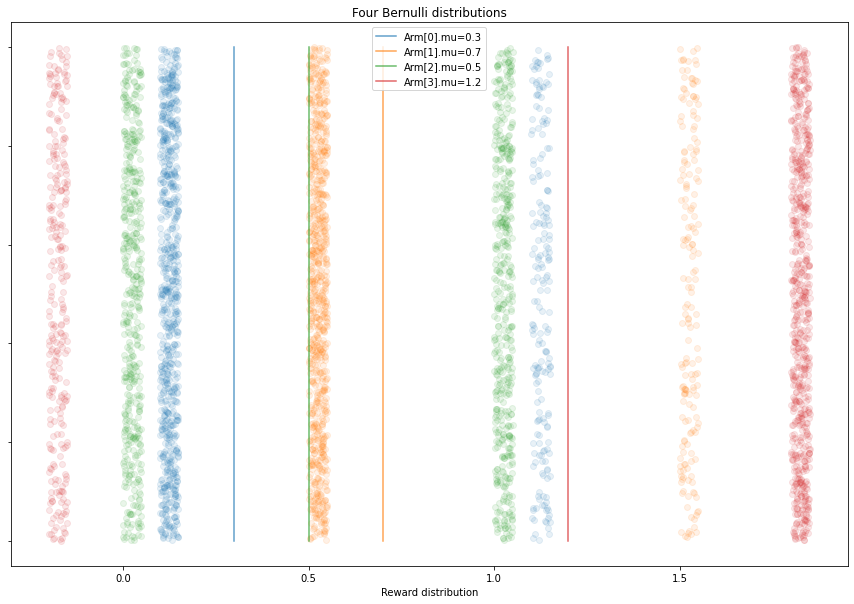

In [3]:
plt.figure(figsize=(15, 10))
plt.title("Four Bernulli distributions")
plt.xlabel("Reward distribution")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, a in enumerate(arms):
    plt.scatter(
        a.x_temp + np.random.uniform(high=0.05, size=t_max), 
        np.random.uniform(high=1, size=t_max), 
        alpha=0.1,
        color=colors[i]
    )
    plt.plot([a.mu] * 2, [0, 1], color=colors[i], alpha=0.7, label=f"Arm[{i}].mu={round(a.mu, 4)}")
plt.legend(loc='upper center')
f = plt.gca()
f.axes.yaxis.set_ticklabels([])
plt.plot()

## Regret
To demonstrate algorithm performance we count _regred_ which equals to difference between constantly playing the best arm and mean regred.  

**Theorem 1.**: Explore-frist algorithm with exploration rounds $N = \frac{t_{max}^{2/3}(4\ log(t_{max}))^{1/3} }{4T}$ achieves regret bound [1] $$\mathbb{E}\big[R(t_{max})\big]\ \leq t_{max}^{2/3} O(m\ log(t_{max}))^{1/3}$$ 

**Theorem 2.**: Epsilon-greedy algorithm with exploration probabilities $\epsilon (t) = t^{−1/3}\ (m\ log(t))^{1/3}$ achieves regret bound $$\mathbb{E}\big[R(t)\big]\ \leq t^{2/3} O(m\ log(t))^{1/3}$$ for each round $t$. [1]

In [ ]:
bandito_run_eg = b_eg()
bandito_run_u = b_u()
best_arm = 3
t = np.arange(1, t_max + 1)

plt.figure(figsize=(15, 10))
plt.yscale("log")
plt.title(f"Regret")
plt.xlabel(r"Time $t$")
plt.ylabel(r"log Regret $R(t)$")
plt.plot(bandito_run_u.regred, label=r"Uniform policy")
plt.plot(bandito_run_eg.regred, label=r"Epsilon-Greedy policy")
plt.plot(
    bandito_run_eg.expected_regred, 
    "--", 
    label=r"Expected regret: $t^{2/3}\ O(m\ log(t)^{1/3})$"
)
plt.legend()
plt.show()

## References
[1] Slivkins A. (2019), *Introduction to Multi-Armed Bandits*, arXiv:1904.07272, https://arxiv.org/abs/1904.07272